In [247]:
import numpy as np
import pandas as pd
import importlib as imp
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D

from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sb

from matplotlib import rcParams

import titanic_util as tu
tu = imp.reload(tu)

In [248]:
%matplotlib inline
rcParams['figure.figsize'] = 6,5

In [282]:
titanic_data = tu.load(opt='train')

attaching_keys=['Sex','Age','Fare','Pclass','Embarked','SibSp','Parch',np.array(['Parch','SibSp'])]

new_data, data_targets = tu.mung(titanic_data, attaching_keys, base_truth='Survived')

# display(titanic_data.head())
# display(new_data.head())

[[-0.17744844 -0.17758616]
 [ 0.24920513 -0.19278978]
 [-0.1263645  -0.47551916]
 [ 0.08083139 -0.5212587 ]
 [ 0.03076343  0.03190238]
 [-0.09468172  0.42315494]
 [ 0.07791154 -0.38868147]
 [ 0.05204283  0.09735121]
 [-0.10297005  0.28368666]
 [-0.51489077 -0.02357901]
 [-0.48576301 -0.08988852]
 [-0.5945893  -0.06102226]]


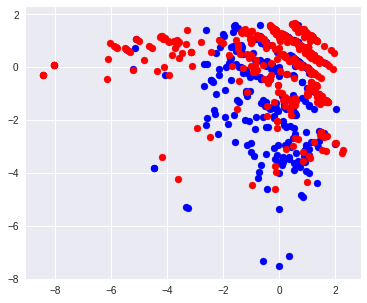

In [283]:
#TODO plot in 3-D as well

pca_vis = tu.PCA(task_type='reduce_dim', pc_count=2)
reduced_data = pca_vis.fit(new_data)

reduced_data = DataFrame(reduced_data); reduced_data.index = new_data.index

who_lives = reduced_data.loc[data_targets==1]
who_dies = reduced_data.loc[data_targets==0]

plt.scatter(who_lives.iloc[:,0], who_lives.iloc[:,1], color='b')
plt.scatter(who_dies.iloc[:,0], who_dies.iloc[:,1], color='r')
plt.show()

[[-0.17744844 -0.17758616  0.04158774]
 [ 0.24920513 -0.19278978 -0.14472857]
 [-0.1263645  -0.47551916 -0.04288657]
 [ 0.08083139 -0.5212587  -0.08217753]
 [ 0.03076343  0.03190238 -0.42959372]
 [-0.09468172  0.42315494  0.42043221]
 [ 0.07791154 -0.38868147  0.33715106]
 [ 0.05204283  0.09735121  0.42286316]
 [-0.10297005  0.28368666 -0.56006049]
 [-0.51489077 -0.02357901  0.02723002]
 [-0.48576301 -0.08988852 -0.02150565]
 [-0.5945893  -0.06102226  0.00786692]]


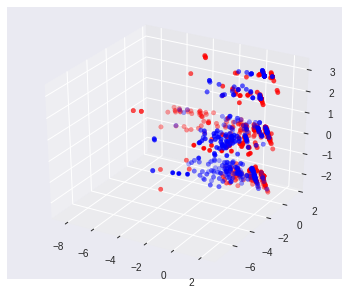

In [284]:
#TODO plot in 3-D as well

pca_vis = tu.PCA(task_type='reduce_dim', pc_count=3)
reduced_data = pca_vis.fit(new_data)

reduced_data = DataFrame(reduced_data); reduced_data.index = new_data.index

who_lives = reduced_data.loc[data_targets==1]
who_dies = reduced_data.loc[data_targets==0]

xlive = np.array(who_lives.iloc[:,0])
ylive = np.array(who_lives.iloc[:,1])
zlive = np.array(who_lives.iloc[:,2])

xdie = np.array(who_dies.iloc[:,0])
ydie = np.array(who_dies.iloc[:,1])
zdie = np.array(who_dies.iloc[:,2])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xlive, ylive, zlive, color='b')
ax.scatter(xdie, ydie, zdie, color='r')
plt.show()

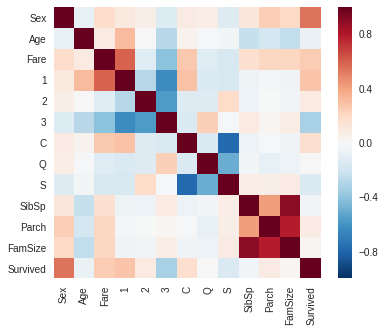

In [285]:
corr = new_data.join(titanic_data['Survived']).corr()

display(sb.heatmap(corr))

In [286]:
#Try clustering, then running a regression on each cluster; data seems to break down into 3 groups

log_reg = tu.LogisticRegressor(max_it=5000, lambd=0.3, alpha=0.01, metric='f1_score')

log_reg.fit(new_data, data_targets, portion_train=0.7, return_differences=True)

print('Training {} was {}'.format(log_reg.metric, 1 - log_reg.train_error))
print('Cross-validation {} was {}'.format(log_reg.metric, 1 - log_reg.cv_error))
print('Optimal weights are: \n{}'.format(log_reg.weights))

,mean_overall,mean_misclass,std_overall,std_misclass
Sex,0.011581,0.058093,1.004311,1.020355
Age,-0.018438,-0.134571,1.001239,1.037672
Fare,0.008015,0.045156,0.995268,0.913233
1,0.018614,0.224989,1.011767,1.109054
2,-0.022425,-0.265158,0.984141,0.741446
3,0.002213,0.021949,1.000574,1.001650
C,0.014494,0.130684,1.012183,1.095881
Q,-0.021933,-0.160499,0.967706,0.711297
S,0.002531,-0.008434,0.999539,1.008329
SibSp,-0.005584,0.027865,0.984018,0.844283


,mean_overall,mean_misclass,std_overall,std_misclass
Sex,-0.026921,0.155022,0.993137,1.042952
Age,0.042862,-0.141976,0.999538,0.959216
Fare,-0.018632,-0.021380,1.014391,0.851673
1,-0.043271,0.017678,0.974503,1.017927
2,0.052130,-0.292179,1.037734,0.705893
3,-0.005144,0.222561,1.002387,0.958264
C,-0.033693,-0.068483,0.974038,0.948409
Q,0.050987,0.111136,1.073217,1.155178
S,-0.005885,-0.004904,1.004784,1.009879
SibSp,0.012980,0.125899,1.039768,1.011224


Training f1_score was 0.7677543186180422
Cross-validation f1_score was 0.6666666666666667
Optimal weights are: 
0     1.356888
1    -0.531206
2     0.203037
3     0.510274
4     0.040076
5    -0.472271
6     0.036085
7     0.090186
8    -0.128361
9    -0.194319
10   -0.056015
11   -0.160794
dtype: float64


In [287]:
testing_data = tu.load('test')

testing_data = tu.mung(testing_data, attaching_keys)

pred = log_reg.predict(testing_data)

display(pred)

0      0.0
1      0.0
2      0.0
3      0.0
4      1.0
5      0.0
6      1.0
7      0.0
8      1.0
9      0.0
10     0.0
11     0.0
12     1.0
13     0.0
14     1.0
15     1.0
16     0.0
17     0.0
18     1.0
19     1.0
20     0.0
21     0.0
22     1.0
23     1.0
24     1.0
25     0.0
26     1.0
27     0.0
28     0.0
29     0.0
      ... 
388    0.0
389    0.0
390    1.0
391    1.0
392    0.0
393    0.0
394    0.0
395    1.0
396    0.0
397    1.0
398    0.0
399    0.0
400    1.0
401    0.0
402    1.0
403    1.0
404    0.0
405    1.0
406    0.0
407    1.0
408    1.0
409    1.0
410    1.0
411    1.0
412    1.0
413    0.0
414    1.0
415    0.0
416    0.0
417    0.0
Length: 418, dtype: float64